In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import copy
import numpy as np



In [5]:

params = {}
params['input_csv_file_name_full'] = file_path = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\TipandCue_DataSample_CSV\\exactEarth_historical_data_02_2023.csv'
params['min_date'] = None
params['max_date'] = None
params['columns_list_keep'] = ['Time','MMSI','IMO','Vessel_Name','Ship_Type','Longitude','Latitude','Message_ID']
params['filter_vessels_df_dic'] = {
          'max_time_diff[mins]':['<=',30]
          }



In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)


# Read the file

In [6]:
def load_data(input_csv_file_name_full,columns_list):
    # Convert the Time column from 'YYYYMMDD_HHMMSS' to 'YYYY-MM-DD HH:MM:SS'
    df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')
    
    pkl_file_name_full= input_csv_file_name_full.replace(".csv",".pkl")

    df_org = load_or_create_df(input_csv_file_name_fullxc, pkl_file_name_full)
    df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')


In [ ]:
load_data(params['input_csv_file_name_full'],columns_list=params['columns_list_keep'])

In [ ]:
# Read the file
import pandas as pd
file_path = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\TipandCue_DataSample_CSV\\'
file_name = 'exactEarth_historical_data_02_2023.csv'
csv_file_name_full = file_path+file_name



df_org = pd.read_csv(csv_file_name_full,low_memory=False)

# Convert the Time column from 'YYYYMMDD_HHMMSS' to 'YYYY-MM-DD HH:MM:SS'
df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')



In [ ]:
import os

def load_or_create_df(csv_file_path, save_path):
    if os.path.exists(save_path):
        print(f"Loading DataFrame from {save_path}")
        df = pd.read_pickle(save_path)
    else:
        print(f"Reading CSV file from {csv_file_path}")
        df = pd.read_csv(csv_file_path, low_memory=False)
        print(f"Saving DataFrame to {save_path}")
        df.to_pickle(save_path)
    return df

file_path = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\TipandCue_DataSample_CSV\\'
file_name = 'exactEarth_historical_data_02_2023.csv'

csv_file_name_full = file_path+file_name

# csv_file_name_full = '471193000.csv'
pkl_file_name_full= csv_file_name_full.replace(".csv",".pkl")

df_org = load_or_create_df(csv_file_name_full, pkl_file_name_full)
df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')


Loading DataFrame from C:\gilad\work\tip_and_que\data\AIS\TipandCue_DataSample_CSV\exactEarth_historical_data_02_2023.pkl


# get a filtered version of the df

In [ ]:
df = copy.deepcopy(df_org)
df_org.info()


# Define the minimum and maximum dates
# min_date = '2023-02-01 00:00:01'
# max_date = '2023-02-02 00:00:01'

min_date = None
max_date = None

# Filter the DataFrame based on the date range
df = filter_df_by_date(df, min_date, max_date)

# get a list of interesing columns
columns_list = ['Time','MMSI','IMO','Vessel_Name','Ship_Type','Longitude','Latitude','Message_ID']
df = df[columns_list]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772085 entries, 0 to 4772084
Columns: 139 entries, MMSI to spare4
dtypes: float64(121), int64(5), object(13)
memory usage: 4.9+ GB


,Time,MMSI,IMO,Vessel_Name,Ship_Type,Longitude,Latitude,Message_ID
0,2023-02-04 14:19:27,377439000,NaN,NaN,NaN,53.7579433333,24.7750816667,1
1,2023-02-02 08:59:00,352724000,NaN,NaN,NaN,34.81821,29.21448,1
2,2023-02-07 12:51:57,563133800,NaN,NaN,NaN,55.049045,25.0228666667,3
3,2023-02-06 22:39:03,613460104,NaN,NaN,NaN,34.6435933333,36.7577,1
4,2023-02-06 06:56:42,341287000,NaN,NaN,NaN,55.2776883333,25.449845,3


## Export to exell

In [3]:
# df.shape
# df.loc[:, 'index'] = df.index
# columns = ['index'] + [col for col in df.columns if col != 'index']
# df = df[columns]
# df.head()
# df.to_excel('output.xlsx', index=False)


# Dividing the df by MMSI

In [ ]:
grouped = df.groupby('MMSI')

# Create a dictionary to store each vessel's data
vessel_data_dic = {vessel_MMSI: group for vessel_MMSI, group in grouped}

# Print the keys of the dictionary (MMSI values)
print(vessel_data_dic.keys())

# Access the data for a specific vessel by its MMSI
# Replace '123456789' with an actual MMSI value from your data
MMSI = 500174
vessel_data_dic[MMSI]


dict_keys([0, 135, 422, 470, 23455, 420393, 500174, 1193046, 2129910, 2129930, 2129940, 2343242, 2576659, 2579999, 2717200, 2717201, 2717202, 2717215, 2717216, 2717218, 2717225, 2717226, 2717260, 2717263, 2717266, 4030945, 4030946, 4031006, 4031009, 4032010, 4033000, 4033001, 4033002, 4033003, 4033004, 4033005, 4082001, 4220407, 4221014, 4224100, 4224200, 4225203, 4225331, 4225399, 4280001, 4282000, 4381234, 4610003, 4661001, 5628343, 6221003, 6221005, 6221120, 6530000, 8821711, 9080716, 9123002, 9124120, 9124269, 9124811, 9125070, 9125082, 9125677, 9126842, 9126858, 9126866, 9126872, 9127182, 9129852, 9719996, 9719997, 9719999, 12345678, 41998001, 85687057, 103981995, 108080056, 108090115, 109012122, 109120254, 111111111, 118170269, 118315001, 123450000, 123456789, 136335526, 152487965, 152487966, 152487967, 152487968, 152487969, 161561880, 200000000, 200000002, 200008824, 201000000, 201892015, 203244573, 205135000, 205221570, 205231000, 205301810, 205373000, 205481000, 205506000, 205

,Time,MMSI,IMO,Vessel_Name,Ship_Type,Longitude,Latitude,Message_ID
13540,2023-02-04 00:26:42,500174,NaN,NaN,NaN,NaN,NaN,8
23939,2023-02-02 14:42:28,500174,NaN,MAJED,NaN,NaN,NaN,24
33788,2023-02-01 10:28:16,500174,NaN,NaN,NaN,55.0836016667,25.5407266667,18
37383,2023-02-02 10:57:56,500174,NaN,NaN,NaN,NaN,NaN,8
49366,2023-02-03 07:23:09,500174,NaN,NaN,NaN,54.9412033333,25.4917216667,18
...,...,...,...,...,...,...,...,...
4715167,2023-02-06 13:38:15,500174,NaN,NaN,NaN,54.8862333333,25.4886416667,18
4727720,2023-02-06 18:35:39,500174,NaN,NaN,NaN,NaN,NaN,8
4732724,2023-02-03 12:49:18,500174,NaN,NaN,NaN,55.0741933333,25.5397483333,18
4754553,2023-02-07 12:07:45,500174,NaN,NaN,NaN,NaN,NaN,8


In [ ]:
# def get_IMO_from_MMSI(MMSI,vessel_data_dic):
# for MMSI in (vessel_data_dic.keys()):
vessel_data_info = {'Nan':[],'single':[],'multiple':[]}
for i, MMSI in enumerate(vessel_data_dic.keys()):
    if (vessel_data_dic[MMSI]['IMO'][vessel_data_dic[MMSI]['IMO'].notna()].unique().shape[0] == 0):
        vessel_data_info['Nan'].append(MMSI)
    elif (vessel_data_dic[MMSI]['IMO'][vessel_data_dic[MMSI]['IMO'].notna()].unique().shape[0] == 1):
        vessel_data_info['single'].append(MMSI)
    elif (vessel_data_dic[MMSI]['IMO'][vessel_data_dic[MMSI]['IMO'].notna()].unique().shape[0] > 1):
        vessel_data_info['multiple'].append(MMSI)

print('Nan:'+ str(len(vessel_data_info['Nan'])))
print('single:'+ str(len(vessel_data_info['single'])))
print('multiple:'+ str(len(vessel_data_info['multiple'])))

MMSI_list = list(vessel_data_dic.keys())


Nan:3990
single:5421
multiple:44


# create the vessels_df

In [ ]:
vessels_df,vessel_MMSI_prob = create_vessels_df(vessel_data_dic,MMSI_list)

processing MMSI 0 out of 9455
processing MMSI 1000 out of 9455
processing MMSI 2000 out of 9455
processing MMSI 3000 out of 9455
processing MMSI 4000 out of 9455
processing MMSI 5000 out of 9455
processing MMSI 6000 out of 9455
processing MMSI 7000 out of 9455
processing MMSI 8000 out of 9455
processing MMSI 9000 out of 9455
total number of MMSI:9455
5318 MMSI's passed
4137 MMSI's failed


## plot some statistis

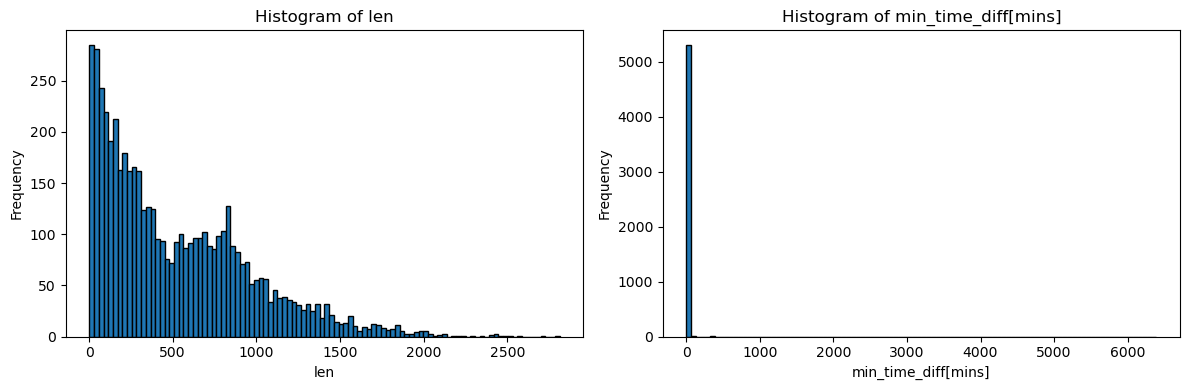

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_vessels_df_statistics(df, columns, bins=10):
    """
    Plots histograms of specified columns in a DataFrame as subplots.

    df (pd.DataFrame): The DataFrame containing the data.
    Parameters:
    columns (list): List of column names to plot.
    bins (int): Number of bins for the histograms.
    """
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Calculate number of rows needed for subplots

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array to easily iterate over it

    for i, column in enumerate(columns):
        try:
            if column in df.columns:
                axes[i].hist(df[column], bins=bins, edgecolor='black')
                axes[i].set_title(f'Histogram of {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel('Frequency')
            else:
                axes[i].text(0.5, 0.5, f'Column {column} not found', ha='center', va='center')
                axes[i].set_title(f'Histogram of {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel('Frequency')
        except:
            print(f'could not plot {column}')
            
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

columns_to_plot = ['field1', 'field2', 'field3']

plot_vessels_df_statistics(vessels_df, ['len','min_time_diff[mins]'], bins=100)


In [ ]:
vessels_df.columns

Index(['len', 'min_time', 'max_time', 'total_time', 'min_time_diff[mins]',
       'max_time_diff[mins]', 'mean_time_diff[mins]', 'min_Longitude',
       'max_Longitude', 'min_Latitude', 'max_Latitude', 'diff_Longitude',
       'diff_Latitude'],
      dtype='object')

## filtering the vessles Df

In [ ]:
filter_dic = {
        'len':['between',(700,800)],
        'min_Longitude': ('between', (40.0, 50.0)),        
      #   'mean_time_diff[mins]':['==',13],
        'min_time':['between',('2023-02-01 00:00:00','2023-02-01 00:01:39')]
              }

filter_dic = {
          'max_time_diff[mins]':['<=',30]
          }

vessels_df_filt = filter_df(vessels_df, filter_dic)
# df_filt.shape
vessels_df_filt

# Save the vessel_data to a jason file

 

In [ ]:
vessel_data_jason_file_path = '.\\data'

In [ ]:

save_vessels_data_to_geojson(vessels_df_filt,vessel_data_dic,vessel_data_jason_file_path)



saving 0 files out of 416
saving 10 files out of 416
saving 20 files out of 416
saving 30 files out of 416
saving 40 files out of 416
saving 50 files out of 416
saving 60 files out of 416
saving 70 files out of 416
saving 80 files out of 416
saving 90 files out of 416
saving 100 files out of 416
saving 110 files out of 416
saving 120 files out of 416
saving 130 files out of 416
saving 140 files out of 416
saving 150 files out of 416
saving 160 files out of 416
saving 170 files out of 416
could not export MMSI=677039100 to jason
saving 180 files out of 416
saving 190 files out of 416
saving 200 files out of 416
saving 210 files out of 416
could not export MMSI=518100934 to jason
saving 220 files out of 416
saving 230 files out of 416
saving 240 files out of 416
saving 250 files out of 416
saving 260 files out of 416
saving 270 files out of 416
saving 280 files out of 416
saving 290 files out of 416
saving 300 files out of 416
saving 310 files out of 416
saving 320 files out of 416
could

# plots of vessel data

In [ ]:

vessel_data = get_vessel_data(vessel_data_dic,MMSI)
plot_df_column_vs_time(vessel_data,column_name='Longitude')


KeyError: 'Time'

In [ ]:
grouped = df.groupby('MMSI')

# Create a dictionary to store each vessel's data
vessel_data_dic = {vessel_MMSI: group for vessel_MMSI, group in grouped}


In [ ]:
# Read the file
import pandas as pd
file_path = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\TipandCue_DataSample_CSV\\'
file_name = 'exactEarth_historical_data_02_2023.csv'
csv_file_name_full = file_path+file_name



df_org = pd.read_csv(csv_file_name_full,low_memory=False)

# Convert the Time column from 'YYYYMMDD_HHMMSS' to 'YYYY-MM-DD HH:MM:SS'
df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')



In [ ]:
import os

def load_or_create_df(csv_file_path, save_path):
    if os.path.exists(save_path):
        print(f"Loading DataFrame from {save_path}")
        df = pd.read_pickle(save_path)
    else:
        print(f"Reading CSV file from {csv_file_path}")
        df = pd.read_csv(csv_file_path, low_memory=False)
        print(f"Saving DataFrame to {save_path}")
        df.to_pickle(save_path)
    return df

file_path = 'C:\\gilad\\work\\tip_and_que\\data\\AIS\\TipandCue_DataSample_CSV\\'
file_name = 'exactEarth_historical_data_02_2023.csv'

csv_file_name_full = file_path+file_name

# csv_file_name_full = '471193000.csv'
pkl_file_name_full= csv_file_name_full.replace(".csv",".pkl")

df_org = load_or_create_df(csv_file_name_full, pkl_file_name_full)
df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')


Loading DataFrame from C:\gilad\work\tip_and_que\data\AIS\TipandCue_DataSample_CSV\exactEarth_historical_data_02_2023.pkl


# get a filtered version of the df

In [ ]:
def load_data(file_name,columns_list):
    df_org = pd.read_csv(csv_file_name_full,low_memory=False)

    # Convert the Time column from 'YYYYMMDD_HHMMSS' to 'YYYY-MM-DD HH:MM:SS'
    df_org = convert_time_format(df_org, 'Time', '%Y%m%d_%H%M%S', '%Y-%m-%d %H:%M:%S')
    

In [ ]:
df = copy.deepcopy(df_org)
df_org.info()


# Define the minimum and maximum dates
# min_date = '2023-02-01 00:00:01'
# max_date = '2023-02-02 00:00:01'

min_date = None
max_date = None

# Filter the DataFrame based on the date range
df = filter_df_by_date(df, min_date, max_date)

# get a list of interesing columns
columns_list = ['Time','MMSI','IMO','Vessel_Name','Ship_Type','Longitude','Latitude','Message_ID']
df = df[columns_list]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772085 entries, 0 to 4772084
Columns: 139 entries, MMSI to spare4
dtypes: float64(121), int64(5), object(13)
memory usage: 4.9+ GB


,Time,MMSI,IMO,Vessel_Name,Ship_Type,Longitude,Latitude,Message_ID
0,2023-02-04 14:19:27,377439000,NaN,NaN,NaN,53.7579433333,24.7750816667,1
1,2023-02-02 08:59:00,352724000,NaN,NaN,NaN,34.81821,29.21448,1
2,2023-02-07 12:51:57,563133800,NaN,NaN,NaN,55.049045,25.0228666667,3
3,2023-02-06 22:39:03,613460104,NaN,NaN,NaN,34.6435933333,36.7577,1
4,2023-02-06 06:56:42,341287000,NaN,NaN,NaN,55.2776883333,25.449845,3


# Functions

## df aux functions

In [ ]:
def filter_df(df, filter_dic):
    """
    Filters a DataFrame based on a dictionary of column filters.

    Parameters:
    df (pd.DataFrame): The DataFrame to be filtered.
    filter_dic (dict): A dictionary where keys are column names and values are tuples.
                       Each tuple contains an operator as the first element and the filter value(s) as the second element.
                       Supported operators: '==', '!=', '<', '<=', '>', '>=', 'between'.

    Returns:
    pd.DataFrame: The filtered DataFrame or an empty DataFrame if any column does not exist.

    Example Usage:
    vessels_df = pd.DataFrame({
        'MMSI': [123456789, 987654321, 192837465],
        'Vessel_Name': ['Vessel A', 'Vessel B', 'Vessel C'],
        'Latitude': [34.5, 45.6, 56.7],
        'Longitude': [-123.4, -134.5, -145.6]
    })

    filter_dic = {
        'Latitude': ('between', (40.0, 50.0)),  # Applying a 'between' filter for Latitude
        'Longitude': ('<=', -134.5),  # Applying a '<=' filter for Longitude
        'Vessel_Name': ('==', ['Vessel A', 'Vessel C']),  # Applying an '==' filter for Vessel_Name
        'Nonexistent_Column': ('==', 'SomeValue')  # Nonexistent column
    }

    filtered_df = filter_df(vessels_df, filter_dic)
    print(filtered_df)
    """
    for column, (operator, value) in filter_dic.items():
        if column not in df.columns:
            print(f"Error: Column '{column}' does not exist in the DataFrame. Existing columns: {list(df.columns)}")
            return pd.DataFrame()  # Return an empty DataFrame
        
        if operator == '==':
            if isinstance(value, list):
                df = df[df[column].isin(value)]
            else:
                df = df[df[column] == value]
        elif operator == '!=':
            df = df[df[column] != value]
        elif operator == '<':
            df = df[df[column] < value]
        elif operator == '<=':
            df = df[df[column] <= value]
        elif operator == '>':
            df = df[df[column] > value]
        elif operator == '>=':
            df = df[df[column] >= value]
        elif operator == 'between':
            if isinstance(value, tuple) and len(value) == 2:
                lower_bound, upper_bound = value
                df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            else:
                raise ValueError(f"Value for 'between' must be a tuple of two elements: {value}")
        else:
            raise ValueError(f"Unsupported operator: {operator}")
    return df


def repeat_single_value_in_column (df,value,column_name,to_print=False):
    if not isinstance(value, list) and not isinstance(value, np.ndarray):
        value = [value]

    # print(value)        
    if (len(value) != 1):
        if (to_print):
            print(f'value is not unique:{value}')
        return pd.DataFrame()
    
    df[column_name] = np.repeat(value,df.shape[0])
    return df


## manage data functions

In [ ]:
class vessels:
    # Class attribute
    vehicle_count = 0

    # Initializer / Instance attributes
    def __init__(self):

    


In [ ]:

def get_vessel_data(vessel_data_dic,vessel_MMSI,to_print=False):
    if (1):
    # try:
        vessel_data = vessel_data_dic[vessel_MMSI]
        
        # repeat missing ID values
        ID_columns = ['IMO','Vessel_Name','Ship_Type']
        for ID_column in ID_columns:
            data = vessel_data[ID_column].loc[vessel_data[ID_column].notna()]
            data = data.unique()
            if (isinstance(data,str)):
                data = data.strip()
            # print(vessel_data.shape)
            vessel_data = repeat_single_value_in_column(vessel_data,data,ID_column)
            # print(vessel_data.shape)
            
            if (vessel_data.empty):
                if (to_print is True):
                    print(f'failed to create data base for vessel_MMSI={vessel_MMSI}')

                return vessel_data


        # take only the lines where there is a Longitude
        # print(vessel_data.shape)

        vessel_data = vessel_data[vessel_data['Longitude'].notna()]

# handle exponent represntations 
        vessel_data.loc[:, 'Latitude'] = vessel_data['Latitude'].apply(convert_to_float)
        vessel_data.loc[:, 'Longitude'] = vessel_data['Longitude'].apply(convert_to_float)
        
        # print(vessel_data.shape)
 
        # sort data by time
        vessel_data = vessel_data.sort_values(by='Time')
        # print('sucess')
    # except:
    #     vessel_data = pd.DataFrame()
    #     # sys.exit(1)   
    return vessel_data



# vessel_MMSI = vessel_data_info['single'][100]
# vesel_data = get_vessel_data(vessel_data_dic,vessel_MMSI)

# vessel_data.head()


def get_vessel_data_stats(vessel_data):
    stats_dic = {
        'len': [vessel_data.shape[0]],  # Scalar value wrapped in a list
        'min_time':get_min_max_dates(vessel_data)[0],
        'max_time':get_min_max_dates(vessel_data)[1],
        'total_time':max(vessel_data['Time'])- min(vessel_data['Time']),
        'min_time_diff[mins]': round(np.min(time_diff_convert(vessel_data['Time'].diff()))),
        'max_time_diff[mins]': round(np.max(time_diff_convert(vessel_data['Time'].diff()))),
        'mean_time_diff[mins]': round(np.mean(time_diff_convert(vessel_data['Time'].diff()))),
        'min_Longitude':convert_to_float(min(vessel_data['Longitude'])),
        'max_Longitude':convert_to_float(max(vessel_data['Longitude'])),
        'min_Latitude':convert_to_float(min(vessel_data['Latitude'])),
        'max_Latitude':convert_to_float(max(vessel_data['Latitude'])),
    }
    stats_dic['diff_Longitude']  = stats_dic['max_Longitude']-stats_dic['min_Longitude']
    stats_dic['diff_Latitude']  = stats_dic['max_Latitude']-stats_dic['min_Latitude']

        # 'diff_Latitude':max(vessel_data['Latitude'])-min(vessel_data['Latitude'])


    return stats_dic






In [ ]:
vesel_data = get_vessel_data(vessel_data_dic,vessel_MMSI)


In [ ]:
# def create_vessels_df(vessel_data_dic,MMSI_list,min_data_len_thresh = 2):
#     vessels_df = pd.DataFrame()
#     vessel_MMSI_prob = []

#     for i,vessel_MMSI in enumerate(MMSI_list):
#         if (i%1000==0):
#             print(f'proccessing MMSI {i} out of {len(vessel_data_info_list)}')
#         vessel_data = get_vessel_data(vessel_data_dic,vessel_MMSI)
#         if (vessel_data.shape[0]<min_data_len_thresh):
#             vessel_MMSI_prob.append(vessel_MMSI)
#         else:
#             vessels_df_line = pd.DataFrame(get_vessel_data_stats(vessel_data), index=[vessel_MMSI])  # Providing index explicitly
#             vessels_df = pd.concat([vessels_df,vessels_df_line])

#     vessels_df = vessels_df.sort_values(by='len',ascending=False)
#     print(vessels_df)
#     return vessles_df


In [ ]:
import pandas as pd

def create_vessels_df(vessel_data_dic, MMSI_list, min_data_len_thresh=2,to_print = True):
    vessels_df = pd.DataFrame()
    vessel_MMSI_prob = []

    for i, vessel_MMSI in enumerate(MMSI_list):
        if (i % 1000 == 0):
            print(f'processing MMSI {i} out of {len(MMSI_list)}')
        vessel_data = get_vessel_data(vessel_data_dic, vessel_MMSI)  # Assuming get_vessel_data is defined elsewhere
        if (vessel_data.shape[0] < min_data_len_thresh):
            vessel_MMSI_prob.append(vessel_MMSI)
        else:
            vessels_df_line = pd.DataFrame(get_vessel_data_stats(vessel_data), index=[vessel_MMSI])
            vessels_df = pd.concat([vessels_df, vessels_df_line])

    vessels_df = vessels_df.sort_values(by='len', ascending=False)

    if (to_print):
        print (f"total number of MMSI:{len(MMSI_list)}")
        print (f"{vessels_df.shape[0]} MMSI's passed")
        print (f"{len(vessel_MMSI_prob)} MMSI's failed")



    return vessels_df,vessel_MMSI_prob  # Corrected return statement

# Example usage:
# vessels_df = create_vessels_df(vessel_data_dic, partial_list)


## File handling functions


In [ ]:
def load_or_create_df(csv_file_path, save_path):
    if os.path.exists(save_path):
        print(f"Loading DataFrame from {save_path}")
        df = pd.read_pickle(save_path)
    else:
        print(f"Reading CSV file from {csv_file_path}")
        df = pd.read_csv(csv_file_path, low_memory=False)
        print(f"Saving DataFrame to {save_path}")
        df.to_pickle(save_path)
    return df

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

def save_vessel_data_to_geojson(vessel_data, file_path = './data', file_name=None):
    """
    Save latitude and longitude data from a DataFrame to a GeoJSON file.
    
    Parameters:
    - vessel_data: pandas DataFrame containing 'Latitude' and 'Longitude' columns.
    - file_path: Directory path where the GeoJSON file will be saved.
    - file_name: Name of the GeoJSON file (without the .geojson extension).
    """

    if (file_name is None):
        file_name = vessel_data['Vessel_Name'].iloc[0]

    file_name = file_name.rstrip()

    # Create a geometry column with Point objects
    geometry = [Point(lon, lat) for lon, lat in zip(vessel_data['Longitude'], vessel_data['Latitude'])]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(vessel_data, geometry=geometry, crs='EPSG:4326')  # Assuming WGS84 projection

    # Save to GeoJSON file
    file_name_geojson = f"{file_path}/{file_name}.geojson"
    gdf.to_file(file_name_geojson, driver='GeoJSON')


def save_vessels_data_to_geojson(vessels_df,vessel_data_dic,file_path):
    for i in range(vessels_df.shape[0]):
        try:
            if (i % 10==0):
                print(f'saving {i} files out of {vessels_df.shape[0]}')
            vessel_data = get_vessel_data(vessel_data_dic,vessels_df.index[i])
            save_vessel_data_to_geojson(vessel_data,file_path)
        except:
            print(f'could not export MMSI={vessels_df.index[i]} to jason')
    print(f'saved {i} files in {file_path}')
    return   



## Time functions

In [ ]:
import pandas as pd

def filter_df_by_date(df, min_date, max_date, time_column='Time', date_format='%Y-%m-%d %H:%M:%S'):
    """
    Function to filter a DataFrame based on a time column and specified date range.
    
    Parameters:
    
    
    - df (pd.DataFrame): The input DataFrame.
    - min_date (str): The minimum date as a string.
    - max_date (str): The maximum date as a string.
    - time_column (str): The name of the column containing time data in the specified format.
    - date_format (str): The format of the date strings in the time column and min_date, max_date.
    
    Returns:
    - filtered_df (pd.DataFrame): The DataFrame filtered by the specified date range.
    """
    # Convert the Time column to datetime
    df[time_column] = pd.to_datetime(df[time_column], format=date_format)

    if (min_date is None):
        min_date = min(df[time_column])

    if (max_date is None):
        max_date = max(df[time_column])


    
    # Convert min_date and max_date to datetime
    min_date = pd.to_datetime(min_date, format=date_format)
    max_date = pd.to_datetime(max_date, format=date_format)
    
    # Filter the DataFrame based on the date range
    filtered_df = df[(df[time_column] >= min_date) & (df[time_column] <= max_date)]
    
    return filtered_df


# Define the minimum and maximum dates
# min_date = '2023-02-01 00:00:01'
# max_date = '2023-02-02 00:00:01'

# # Filter the DataFrame based on the date range
# df = filter_df_by_date(df, min_date, max_date)

# get_min_max_dates(df)



def time_diff_convert(time_diff,units='mins',to_round=True):
    if (not isinstance(time_diff,pd.core.series.Series)):
        is_series = False
        time_diff = pd.Series(time_diff)
    else:
        is_series = True

    if (units == 'secs'):        
        time_diff_mod = time_diff.apply(lambda x: x.total_seconds()) 
    
    if (units == 'mins'):        
        time_diff_mod = time_diff.apply(lambda x: x.total_seconds() / 60) 

    if (units == 'hours'):        
        time_diff_mod = time_diff.apply(lambda x: x.total_seconds() / 3600) 

    if (to_round):
        time_diff_mod = round(time_diff_mod)

    if (not is_series):
        time_diff_mod = time_diff_mod.values[0]        
    return time_diff_mod
    


    
def convert_time_format(df, time_column, current_format, output_format):
    """
    Function to convert the time format of a specified column in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - time_column (str): The name of the column containing time data.
    - current_format (str): The current format of the time data in the column.
    - output_format (str): The desired output format for the tim data.
    
    Returns:
    - df (pd.DataFrame): The DataFrame with the time column converted to the desired format.
    """
    # Convert the Time column to datetime using the current format
    df[time_column] = pd.to_datetime(df[time_column], format=current_format)
    
    # Convert the datetime to the desired output format
    df[time_column] = df[time_column].dt.strftime(output_format)
    
    return df




def get_min_max_dates(df, time_column='Time',input_format = '%Y-%m-%d %H:%M:%S',output_format='%Y-%m-%d %H:%M:%S'):
    """
    Function to get the minimum and maximum dates from a DataFrame's time column.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - time_column (str): The name of the column containing time data in '%Y-%m-%d %H:%M:%S' format.
    - output_format (str): The desired output datetime format.
    
    Returns:
    - min_date (str): The minimum date in the desired format.
    - max_date (str): The maximum date in the desired format.
    """
    # Convert the Time column to datetime
    df[time_column] = pd.to_datetime(df[time_column], format=input_format)
    
    # Get the minimum and maximum dates
    min_date = df[time_column].min().strftime(output_format)
    max_date = df[time_column].max().strftime(output_format)
    
    return min_date, max_date



# # Get the minimum and maximum dates in the desired format
# min_date, max_date = get_min_max_dates(df)

# print("Min date:", min_date)
# print("Max date:", max_date)


## Plot Functions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
def plot_df_column_vs_time(df,column_name,time_column_name='Time'):

    # Sample data
    dates = df[time_column_name].dt.strftime('%Y-%m-%d %H:%M:%S').to_list()
    values = df[column_name]

    # Create a figure with a larger size
    plt.figure(figsize=(7, 4))

    # Create a line plot
    plt.plot(dates, values)

    # Rotate x-tick labels by 45 degrees and change their font size
    plt.xticks(rotation=45, fontsize=12, ha='right')


    # Use MaxNLocator to reduce the number of ticks
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust the number of bins as needed

    # Add labels and title
    plt.xlabel('Date and Time')
    plt.ylabel('Values')
    plt.title('Plot with Rotated and Formatted x-tick Labels')

    # Add grid
    plt.grid(True)

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Optionally adjust the subplots manually
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()



## data converters

In [ ]:
def convert_to_float(s):
    """
    Convert a string representation of a number in exponential format to a float.
    
    Parameters:
    - s: String containing the number in exponential format.
    
    Returns:
    - Float representation of the number.
    """
    try:
        # Check if the string contains a decimal point in the exponent part
        if 'E+' in s or 'E-' in s or 'e+' in s or 'e-' in s:
            parts = s.split('E') if 'E' in s else s.split('e')
            
            # Extract the base number and exponent
            base = float(parts[0])
            exponent = float(parts[1])
            
            # Adjust exponent if it contains a decimal point
            if '.' in parts[1]:
                exponent = int(float(parts[1]))  # Convert to int to remove decimal part
            
            # Calculate the final float value
            result = base * (10 ** exponent)
            
            return result
        
        # If no 'E' or 'e' found, convert directly to float
        return float(s)
    
    except ValueError as e:
        print(f"Error converting '{s}' to float: {e}")
        return None


